In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
dfx = pd.read_csv("./Training Data/Logistic_X_Train.csv")
dfy = pd.read_csv("./Training Data/Logistic_Y_Train.csv")
dft = pd.read_csv("./Test Cases/Logistic_X_Test.csv")

In [13]:
X_train = dfx.values
Y_train = dfy.values

X_test = dft.values

print(X_train.shape, X_test.shape, Y_train.shape)

(3000, 3) (1000, 3) (3000, 1)


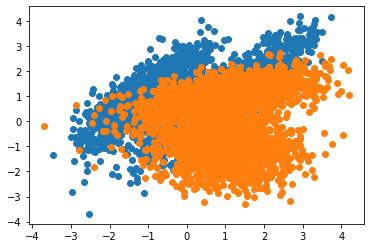

In [14]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [18]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))

b = 5*np.random.random()

In [19]:
for i in range(1000):
    l, W, b = grad_descent(X_train, Y_train, W, b)
    if i%100 == 0: print(l)
    loss.append(l)

[5.77061868]
[0.45451715]
[0.25557995]
[0.17992667]
[0.14341343]
[0.12284753]
[0.10967631]
[0.10041148]
[0.09346761]
[0.08803472]


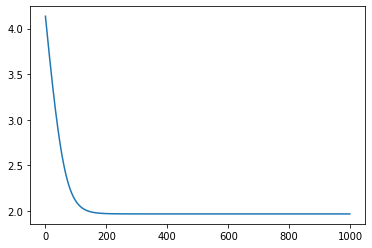

In [17]:
plt.plot(loss)

In [32]:
Y_ = []
for i in range(X_test.shape[0]):
    y_ = predict(X_test[i], W, b)
    Y_.append(y_)

print(len(Y_))

1000


In [34]:
out = pd.DataFrame(Y_)
out.to_csv("chemical_predictions.csv", index=False)